In [24]:
import pandas as pd

homeprice=[
('monroe township',2600,550000),
('monroe township',3000,565000),
('monroe township',3200,610000),
('monroe township',3600,680000),
('monroe township',4000,725000),
('west windsor',2600,585000),
('west windsor',2800,615000),
('west windsor',3300,650000),
('west windsor',3600,710000),
('robinsville',2600,575000),
('robinsville',2900,600000),
('robinsville',3100,620000),
('robinsville',3600,695000)
]
df=pd.DataFrame(homeprice,columns=['town','area','price'])
df.head(1)

,town,area,price
0,monroe township,2600,550000


#town is feature in the dataset these column we have to convert into number for ML processing

In [45]:
d1=pd.get_dummies(df.town,dtype=int)
merged=pd.concat([df,d1],axis='columns')
merged.head(5)

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0


#3 dummy variable column created and they will create multicolinearity/dummy variable trap, to avoid drop one dummy col

In [47]:
final=merged.drop(columns=['town','west windsor'])
final.head(5)

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0


In [49]:
X=final.drop(columns='price')
y=final.price
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [51]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [53]:
from sklearn import linear_model 

In [57]:
model=linear_model.LinearRegression()
model.fit(X,y)
model.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [59]:
model.intercept_

249790.36766292521

In [61]:
model.predict([[2800,0,1]])#robinsville

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [65]:
model.predict([[3400,0,0]])#west windsor

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [67]:
model.predict([[3400,1,0]])#monroe township	

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([641227.69296925])

In [69]:
model.score(X,y)

0.9573929037221871

In [161]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
dfle=df
dfle.town=le.fit_transform(dfle.town)
dfle
y=dfle.price
X=dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [163]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [165]:
X=ct.fit_transform(X)

In [167]:
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [169]:
X=X[:,1:] #Here droping oth index to avoid dummy variable trap
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [183]:
model1=linear_model.LinearRegression()
model1.fit(X,y)
model1.score(X,y)

0.9573929037221873

In [185]:
model1.coef_

array([25686.4115244 , 40013.97548914,   126.89744141])

In [187]:
model1.intercept_

209776.39217374485

In [189]:
model1.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.66845839])

In [191]:
model1.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

In [193]:
df=pd.DataFrame([
    ('BMW X5',69000,18000,6),
('BMW X5',35000,34000,3),
('BMW X5',57000,26100,5),
('BMW X5',22500,40000,2),
('BMW X5',46000,31500,4),
('Audi A5',59000,29400,5),
('Audi A5',52000,32000,5),
('Audi A5',72000,19300,6),
('Audi A5',91000,12000,8),
('Mercedez Benz C class',67000,22000,6),
('Mercedez Benz C class',83000,20000,7),
('Mercedez Benz C class',79000,21000,7),
('Mercedez Benz C class',59000,33000,5)
], columns=['model','mileage','price','age'])
df

,model,mileage,price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [205]:
d1=pd.get_dummies(df.model,dtype=int)
mdf=pd.concat([df,d1],axis='columns')
mdf

,model,mileage,price,age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [207]:
finaldf=mdf.drop(columns=['model','Mercedez Benz C class'])
finaldf

,mileage,price,age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [209]:
X=finaldf.drop(columns='price')
X

,mileage,age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [213]:
y=finaldf.price
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: price, dtype: int64

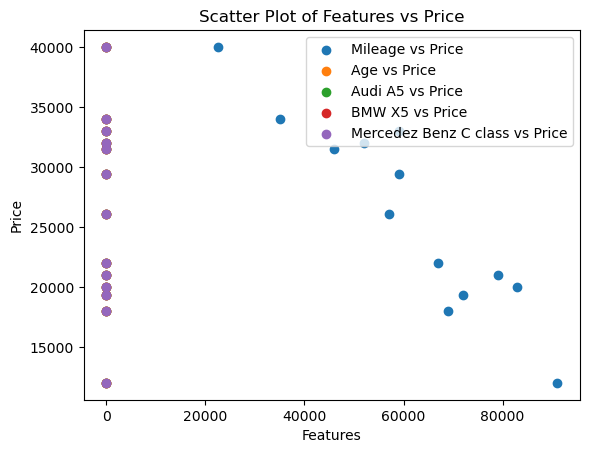

In [225]:
import matplotlib.pyplot as plt
# Create scatter plots
plt.scatter(mdf.mileage, mdf.price, label='Mileage vs Price')
plt.scatter(mdf.age, mdf.price, label='Age vs Price')
plt.scatter(mdf['Audi A5'], mdf.price, label='Audi A5 vs Price')
plt.scatter(mdf['BMW X5'], mdf.price, label='BMW X5 vs Price')
plt.scatter(mdf['Mercedez Benz C class'], mdf.price, label='Mercedez Benz C class vs Price')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Price')
plt.title('Scatter Plot of Features vs Price')
plt.legend()
# Show plot
plt.show()

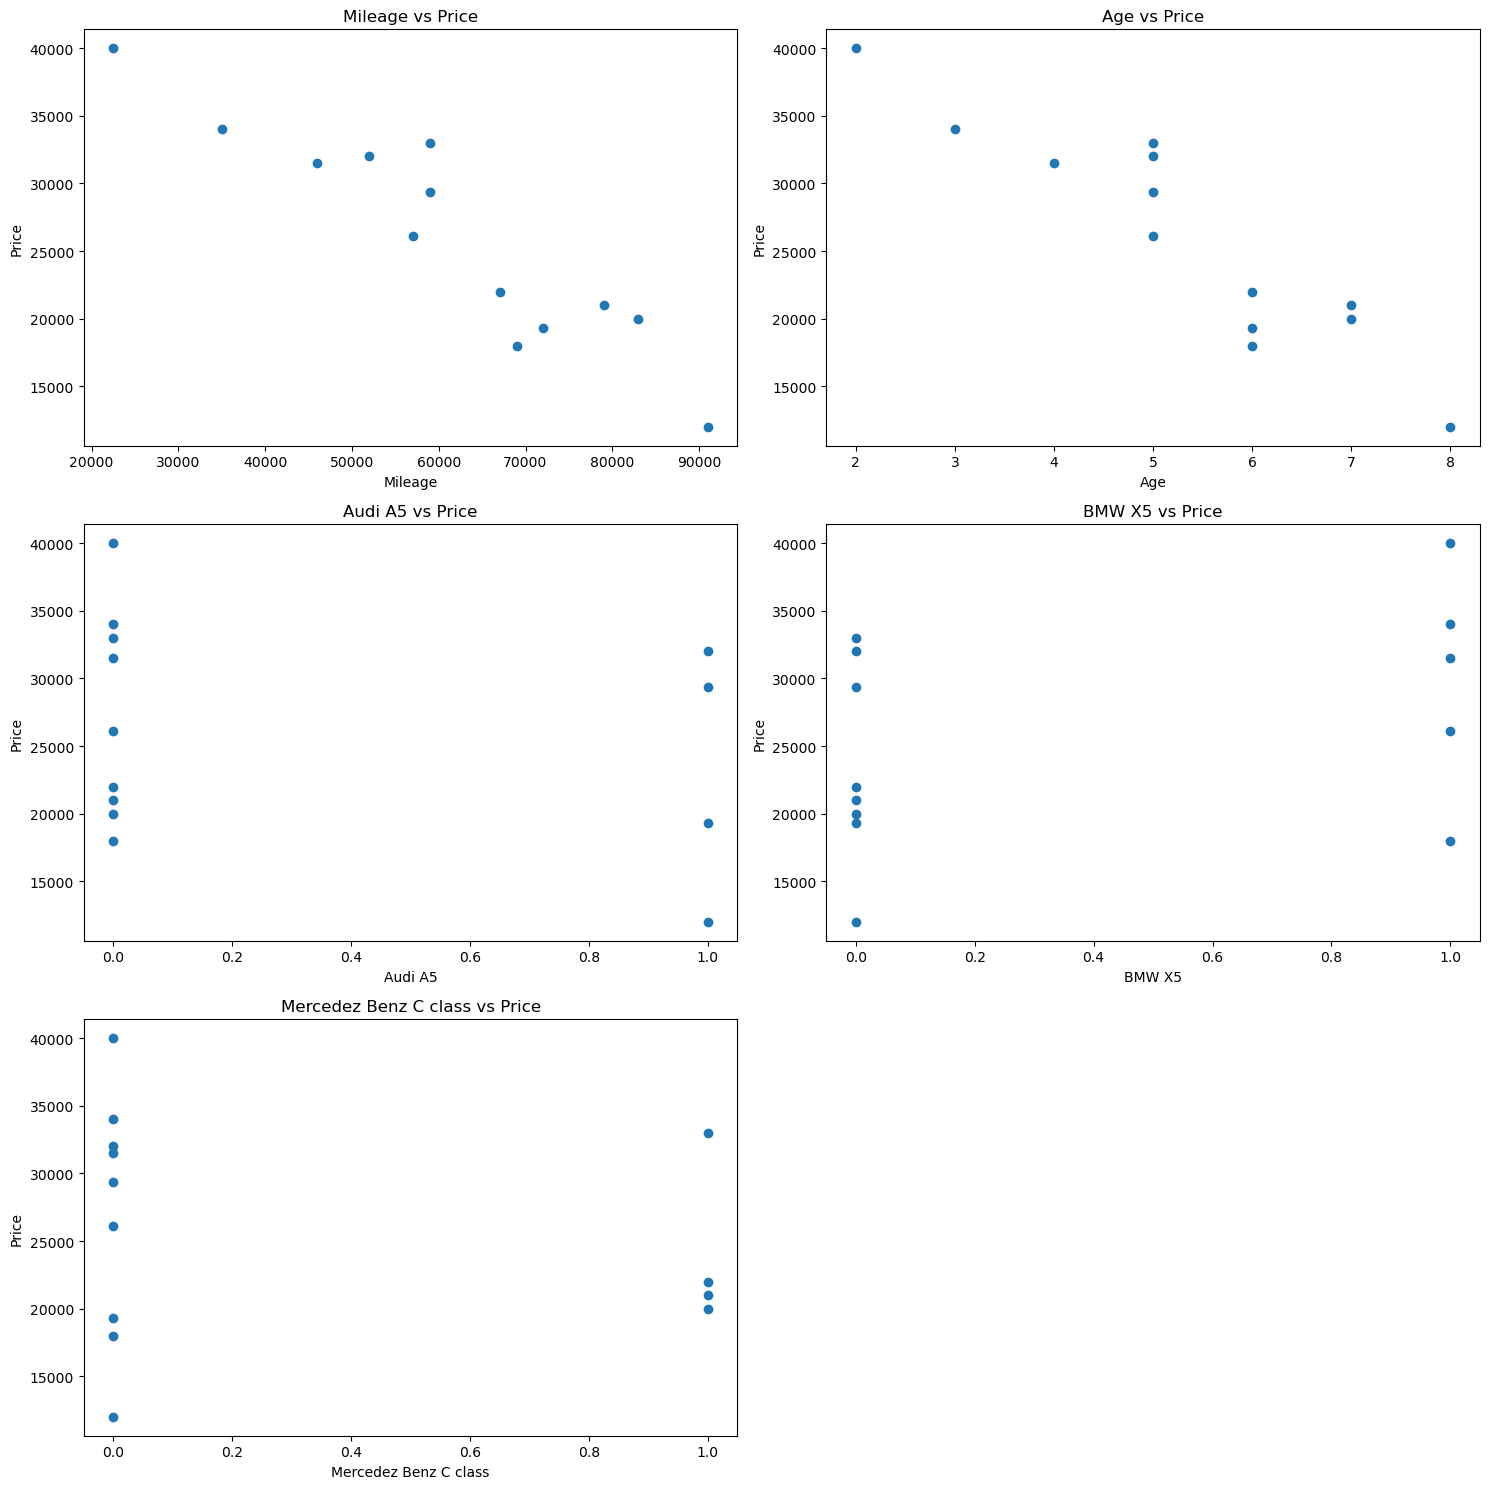

In [227]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot for Mileage vs Price
axs[0, 0].scatter(mdf.mileage, mdf.price)
axs[0, 0].set_title('Mileage vs Price')
axs[0, 0].set_xlabel('Mileage')
axs[0, 0].set_ylabel('Price')

# Scatter plot for Age vs Price
axs[0, 1].scatter(mdf.age, mdf.price)
axs[0, 1].set_title('Age vs Price')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Price')

# Scatter plot for Audi A5 vs Price
axs[1, 0].scatter(mdf['Audi A5'], mdf.price)
axs[1, 0].set_title('Audi A5 vs Price')
axs[1, 0].set_xlabel('Audi A5')
axs[1, 0].set_ylabel('Price')

# Scatter plot for BMW X5 vs Price
axs[1, 1].scatter(mdf['BMW X5'], mdf.price)
axs[1, 1].set_title('BMW X5 vs Price')
axs[1, 1].set_xlabel('BMW X5')
axs[1, 1].set_ylabel('Price')

# Scatter plot for Mercedez Benz C class vs Price
axs[2, 0].scatter(mdf['Mercedez Benz C class'], mdf.price)
axs[2, 0].set_title('Mercedez Benz C class vs Price')
axs[2, 0].set_xlabel('Mercedez Benz C class')
axs[2, 0].set_ylabel('Price')

# Hide the empty subplot (bottom right)
fig.delaxes(axs[2][1])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [229]:
mdl=linear_model.LinearRegression()
mdl.fit(X,y)
mdl.score(X,y)

0.9417050937281082

In [231]:
X

,mileage,age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [233]:
mdl.predict([[45000,4,0,0]])#mercedez benz that is 4 yr old with mileage 45000

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [235]:
mdl.predict([[86000,7,0,1]])#BMW X5 that is 7 yr old with mileage 86000

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [277]:
df=pd.DataFrame([
    (69000,6,18000),
(35000,3,34000),
(57000,5,26100),
(22500,2,40000),
(46000,4,31500),
(59000,5,26750),
(52000,5,32000),
(72000,6,19300),
(91000,8,12000),
(67000,6,22000),
(83000,7,18700),
(79000,7,19500),
(59000,5,26000),
(58780,4,27500),
(82450,7,19400),
(25400,3,35000),
(28000,2,35500),
(69000,5,19700),
(87600,8,12800),
(52000,5,28200)
],columns=['mileage','age','price'])
df.head(4)

,mileage,age,price
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000


In [279]:
X=df.drop(columns='price')
y=df.price
from sklearn.model_selection import train_test_split

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
mdl=linear_model.LinearRegression()
mdl.fit(X_train,y_train)
mdl.score(X_train,y_train)

0.9384897023666824

In [293]:
mdl.score(X_test,y_test)

0.921242248377633

In [295]:
print(X_test)
y_test

    mileage  age
7     72000    6
10    83000    7
5     59000    5
6     52000    5
3     22500    2
18    87600    8


7     19300
10    18700
5     26750
6     32000
3     40000
18    12800
Name: price, dtype: int64

In [297]:
mdl.predict(X_test)

array([20668.52722622, 16762.33242213, 25160.18381011, 27209.30003936,
       37903.32633702, 14729.61531335])